In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Random Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv('/content/drive/MyDrive/Dataset/ford.csv')

In [ ]:
iris

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
# from sklearn.model_selection import train_test_split
# x=iris.copy()
# y=iris['species']
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [ ]:
# 3. Feature Extraction and Engineering
features_names = ['count','hate_speech','offensive_language','neither']
training_features = iris[features_names]
training_features

,count,hate_speech,offensive_language,neither
0,3,0,0,3
1,3,0,3,0
2,3,0,3,0
3,3,0,2,1
4,6,0,6,0
...,...,...,...,...
24778,3,0,2,1
24779,3,0,1,2
24780,3,0,3,0
24781,6,0,6,0


In [ ]:
outcome_name = ['class']
outcome_labels = iris[outcome_name]
outcome_labels

,class
0,2
1,1
2,1
3,1
4,1
...,...
24778,1
24779,2
24780,1
24781,1


In [ ]:
numeric_feature_names = ['count','hate_speech','offensive_language','neither']
# categorical_feature_names = ['event']

In [ ]:
training_features[numeric_feature_names]

,count,hate_speech,offensive_language,neither
0,3,0,0,3
1,3,0,3,0
2,3,0,3,0
3,3,0,2,1
4,6,0,6,0
...,...,...,...,...
24778,3,0,2,1
24779,3,0,1,2
24780,3,0,3,0
24781,6,0,6,0


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# ss, now u go and study these numeric columns --> i.e. fit() over it
ss.fit(training_features[numeric_feature_names])

# ss, now appear for the test
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])
training_features

<ipython-input-37-0917ee95f797>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])


,count,hate_speech,offensive_language,neither
0,-0.275721,-0.443966,-1.724780,2.201388
1,-0.275721,-0.443966,0.418948,-0.493361
2,-0.275721,-0.443966,0.418948,-0.493361
3,-0.275721,-0.443966,-0.295628,0.404888
4,3.121625,-0.443966,2.562676,-0.493361
...,...,...,...,...
24778,-0.275721,-0.443966,-0.295628,0.404888
24779,-0.275721,-0.443966,-1.010204,1.303138
24780,-0.275721,-0.443966,0.418948,-0.493361
24781,3.121625,-0.443966,2.562676,-0.493361


In [ ]:
# Engineering Categorical features
# import pandas as pd
# training_features = pd.get_dummies(training_features, columns=categorical_feature_names)
# training_features

In [ ]:
training_features.columns

Index(['count', 'hate_speech', 'offensive_language', 'neither'], dtype='object')

In [ ]:
list(set(training_features.columns) - set(numeric_feature_names))

[]

In [ ]:
import numpy as np
y = np.array(outcome_labels['class'])
y

array([2, 1, 1, ..., 1, 1, 2])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
model = classifier.fit(training_features, outcome_labels)

<ipython-input-41-55915eebaa87>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = classifier.fit(training_features, outcome_labels)


In [ ]:
model

RandomForestClassifier()

In [ ]:
pred_labels = model.predict(training_features)
actual_labels = np.array(outcome_labels['class'])
print(pred_labels)
print()
print(actual_labels)

[2 1 1 ... 1 1 2]

[2 1 1 ... 1 1 2]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:\n")
accuracy_score(actual_labels,pred_labels)

Accuracy:



1.0

In [ ]:

print("Confusion Matrix:\n")
confusion_matrix(actual_labels,pred_labels)

Confusion Matrix:



array([[ 1430,     0,     0],
       [    0, 19190,     0],
       [    0,     0,  4163]])

In [ ]:
print("Classification Report:\n")
print(classification_report(actual_labels,pred_labels))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1430
           1       1.00      1.00      1.00     19190
           2       1.00      1.00      1.00      4163

    accuracy                           1.00     24783
   macro avg       1.00      1.00      1.00     24783
weighted avg       1.00      1.00      1.00     24783



<Axes: >

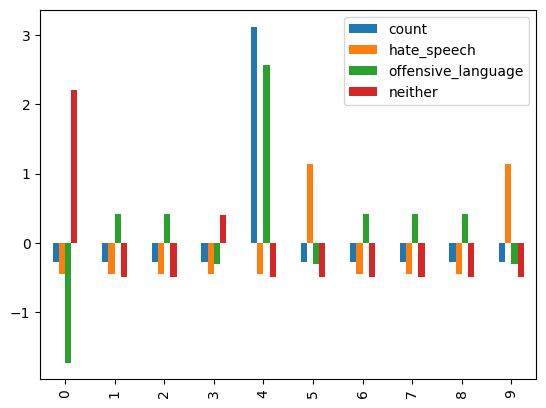

In [ ]:
training_features.head(10).plot(kind='bar')

In [ ]:
# from sklearn import tree
# from matplotlib import pyplot as plt
# import seaborn as sn
# fig = plt.figure(figsize=(25,20))
#  _=tree.plot_tree(model,
#                 training_features=training_features,
#                 class_names={0:'Iris-setosa',1:'Iris-versicolor'},
#                 filled=True,
#                 fontsize=12)

<Axes: >

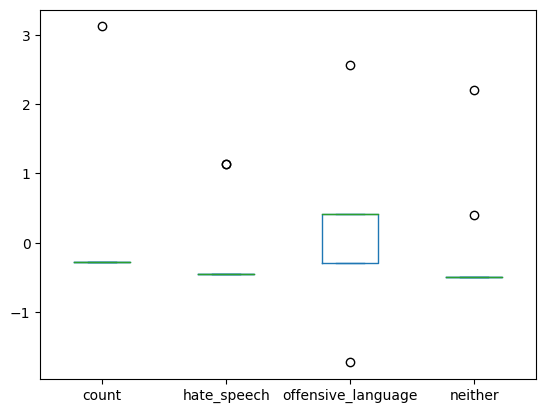

In [ ]:
training_features.head(10).plot(kind='box')

In [ ]:
import seaborn as sn
# hm = sn.heatmap(training_features=training_features)
# data = np.random.randint(low = 1,
#                          high = 100,
#                          size = (10, 10))
# training_features.head(10).plot(kind='heatmap')

>>..

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ford = pd.read_csv('/content/drive/MyDrive/Dataset/ford.csv')

In [ ]:
ford

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [ ]:
df = pd.DataFrame(ford)
  
display(df.drop_duplicates())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [ ]:
def data_processing(ford):
    ford = ford.lower()
    ford = re.sub(r'\@w+|\#','',ford)
    ford = re.sub(r'[^\w\s]','',ford)
    ford = re.sub(r'_','',ford)
    ford = re.sub(r'[0-9]','',ford)
    ford_tokens = word_tokenize(ford)
    filtered_ford = [w for w in ford_tokens if not w in stop_words]
    return "".join(filtered_ford)

In [ ]:
ford

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [ ]:
training_features.head(10).plot(kind='box')

In [ ]:
features_names = ['model','year','transmission','mileage','fuelType','tax','mpg','engineSize']
training_features = ford[features_names]
training_features

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [ ]:
outcome_name = ['price']
outcome_labels = ford[outcome_name]
outcome_labels

,price
0,12000
1,14000
2,13000
3,17500
4,16500
...,...
17961,8999
17962,7499
17963,9999
17964,8299


In [ ]:
numeric_feature_names = ['year','mileage','tax','mpg','engineSize']
categorical_feature_names = ['model','transmission','fuelType']

In [ ]:
training_features[numeric_feature_names]

,year,mileage,tax,mpg,engineSize
0,0.065128,-0.380998,0.591358,-0.020442,-0.811386
1,0.552866,-0.733359,0.591358,-0.020442,-0.811386
2,0.065128,-0.560132,0.591358,-0.020442,-0.811386
3,1.040605,-0.662640,0.510727,-1.738890,0.345070
4,1.040605,-1.123724,0.510727,-0.909294,-0.811386
...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.067312,0.113779
17962,-1.398088,0.890398,-1.343791,-0.020442,-0.811386
17963,-0.910349,-0.839822,-1.505053,0.927668,0.576362
17964,0.552866,-0.942690,0.510727,-0.020442,-0.348804


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# ss, now u go and study these numeric columns --> i.e. fit() over it
ss.fit(training_features[numeric_feature_names])

# ss, now appear for the test
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])
training_features


<ipython-input-24-0917ee95f797>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,0.065128,Automatic,-0.380998,Petrol,0.591358,-0.020442,-0.811386
1,Focus,0.552866,Manual,-0.733359,Petrol,0.591358,-0.020442,-0.811386
2,Focus,0.065128,Manual,-0.560132,Petrol,0.591358,-0.020442,-0.811386
3,Fiesta,1.040605,Manual,-0.662640,Petrol,0.510727,-1.738890,0.345070
4,Fiesta,1.040605,Automatic,-1.123724,Petrol,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,B-MAX,0.065128,Manual,-0.342172,Petrol,0.591358,-1.067312,0.113779
17962,B-MAX,-1.398088,Manual,0.890398,Petrol,-1.343791,-0.020442,-0.811386
17963,Focus,-0.910349,Manual,-0.839822,Diesel,-1.505053,0.927668,0.576362
17964,KA,0.552866,Manual,-0.942690,Petrol,0.510727,-0.020442,-0.348804


In [ ]:
import numpy as np
y = np.array(outcome_labels['price'])
y

array([12000, 14000, 13000, ...,  9999,  8299,  8299])

<Axes: >

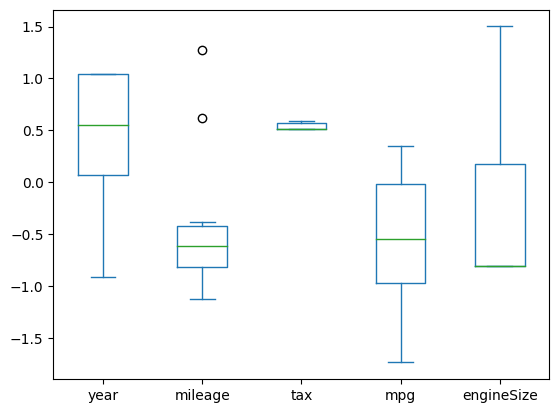

In [ ]:
training_features.head(10).plot(kind='box')

Text(0.5, 0, 'Pies Consumed')

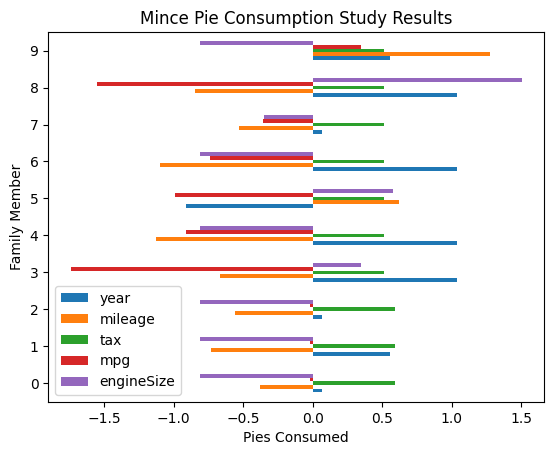

In [ ]:
training_features.head(10).plot(kind='barh')

In [ ]:
# training_features['ford'].plot(kind="barh")

In [ ]:
# training_features.plot(kind="bar")

In [ ]:
# 3. Feature Extraction and Engineering
# features_names = ['model','year','transmission','mileage','fuelType','tax','mpg','engineSize']
# training_features = iris[features_names]
# training_features

In [ ]:
# outcome_name = ['price']
# outcome_labels = iris[outcome_name]
# outcome_labels

In [ ]:
# numeric_feature_names = ['year','mileage','tax','mpg','engineSize']
# categorical_feature_names = ['model','transmission','fuelType']

In [ ]:
# training_features[numeric_feature_names]

In [ ]:
# training_features.head(10).plot(kind='box')